# Gender Gap in Tech as at 2019

### The gender gap in the tech industry is very real — here’s what it looks like

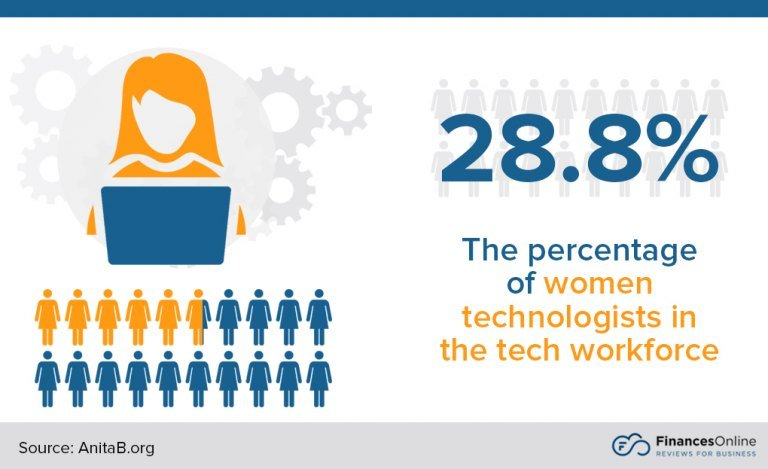

This notebook will look at:

-Data visualization of the gender gap in tech, especially in the data science field.


 Data Source  https://kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv

# Data Visualization

In [1]:
 #imports
    
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
#Read data

df = pd.read_csv('multiple_choice_responses.csv')

/Users/saniamo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.



### Data cleaning

In [3]:
# Selecting relevant columns

df = df[['Q1','Q2','Q3','Q4','Q5','Q10']]
df.columns = ['age','gender','country','education','job title','salary']
df = df.drop(df.index[0])
df.head()

,age,gender,country,education,job title,salary
1,22-24,Male,France,Master’s degree,Software Engineer,"30,000-39,999"
2,40-44,Male,India,Professional degree,Software Engineer,"5,000-7,499"
3,55-59,Female,Germany,Professional degree,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"250,000-299,999"
5,22-24,Male,India,Bachelor’s degree,Other,"4,000-4,999"


### Visualizing gender distribution

In [4]:
gender = df['gender'].value_counts()

colors = ['yellow', 'darkorange', 'green', 'red']
trace = go.Pie(values=(np.array((gender / gender.sum())*100)),labels=(np.array(gender.index)))
layout = go.Layout(title='Gender')

data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

py.plot(fig)

'temp-plot.html'

From the plot, 81.8% of the survey respondents are male and only around 16% are female.

### Visualizing age distribution

In [5]:
# age distribution:

agedist = df['age'].value_counts()
colors = ['yellow', 'darkorange', 'green', 'red']
trace = go.Pie(values=(np.array(agedist)),labels=agedist.index)
layout = go.Layout(title='Age')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()
py.plot(fig)

'temp-plot.html'

Majority of survey respondents are fairly young around 25 to 34 years of age.

### Visualizing Age distribution of all respondents with gender


In [6]:
# age and gender:
age_gender = df.loc[:,["age", "gender"]].groupby(["age", "gender"]).size().reset_index()
age_gender.columns = ["Age", "Gender", "Count"]
fig = px.bar(age_gender, x='Age', y='Count', color="Gender", 
             barmode='group', title ="Age Distribution by Gender", 
             height=500, width=800)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()


### Visualizing Education level


In [7]:
# education level
edu_count= pd.DataFrame({'education':df["education"].value_counts().index, 'counts':df["education"].value_counts().values}).sort_values("counts")
fig = px.bar(edu_count, x='education', y='counts')
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Education Level')
py.plot(fig, filename="edu level.html")
fig.show()

Majority of survey respondents have a Master’s, or at least a Bachelor’s degree.

### Visualizing Education level and gender


In [8]:
# education and gender:
import plotly.express as px
education_gender = df.loc[:,["education", "gender"]].groupby(["education", "gender"]).size().reset_index()
education_gender.columns = ["Education", "Gender", "Count"]
fig = px.bar(education_gender, x='Education', y='Count', color="Gender", 
             barmode='group', title ="Education Distribution by Gender", 
             height=500, width=800)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

Education levels of both male and female respondents show similar patterns — female respondents are just as well educated as male respondents.

### Visualizing Job title distribution


In [9]:
# job title
job_count= pd.DataFrame({'job title':df["job title"].value_counts().index, 'counts':df["job title"].value_counts().values}).sort_values("counts")
fig = px.bar(job_count, x='job title', y='counts')
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Job Title')
py.plot(fig, filename="job.html")
fig.show()

Most respondents seem to be data scientists or students. There are only a handful of statisticians and database engineers.

### Job title distribution by gender

In [12]:
import plotly.express as px
jobtitle_gender = df.loc[:,["job title", "gender"]].groupby(["job title", "gender"]).size().reset_index()
jobtitle_gender.columns = ["job title", "gender", "Count"]
fig = px.bar(jobtitle_gender, x='job title', y='Count', color="gender", 
             barmode='group', title ="Job title Distribution by Gender", 
             height=500, width=800)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

### Salary distribution


In [13]:
sal_count= pd.DataFrame({'sal':df["salary"].value_counts().index, 'counts':df["salary"].value_counts().values}).sort_values("counts")
fig = px.bar(sal_count, x='sal', y='counts')
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Salary')
py.plot(fig)
fig.show()


### Salary gender distribution

In [14]:
sal = df.loc[:,["salary", "gender"]].groupby(["salary", "gender"]).size().reset_index()
sal.columns = ["Salary", "Gender", "Count"]
fig = px.bar(sal, x='Salary', y='Count', color="Gender", 
             barmode='group', title ="Salary Gender Distribution", 
             height=400, width=2000)
fig.update_traces(marker_line_color='rgb(9,50,100)',
                  marker_line_width=1.5, opacity=0.6)
py.plot(fig)
fig.show()

### Conclusion
 
Gender disparity in the tech industry is real and women are underrepresented in this field.

